In [1]:
import os

# For fast CPU-only startup 
os.environ['CUDA_VISIBLE_DEVICES'] = ''
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import time
from ML4transients.data_access import DatasetLoader
from ML4transients.training import PytorchDataset
import pandas as pd
import numpy as np

print("Loading dataset...")
t0 = time.time()
dataset = DatasetLoader('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd')
print(f"Dataset loaded in {time.time() - t0:.2f} seconds")


2025-11-06 15:49:27.633480: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762440567.656102 1267897 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762440567.662979 1267897 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762440567.681506 1267897 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762440567.681525 1267897 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1762440567.681527 1267897 computation_placer.cc:177] computation placer alr

Loading dataset...
Dataset loaded in 0.11 seconds


In [2]:
dataset._discover_data()


Data discovery completed in 0.01s: 862 cutout visits, 862 feature visits, 1 lightcurve paths


# Cutouts


Discovering data files...
Data discovery completed in 0.01s: 862 cutout visits, 862 feature visits, 1 lightcurve paths
Loading cutouts from visit 274


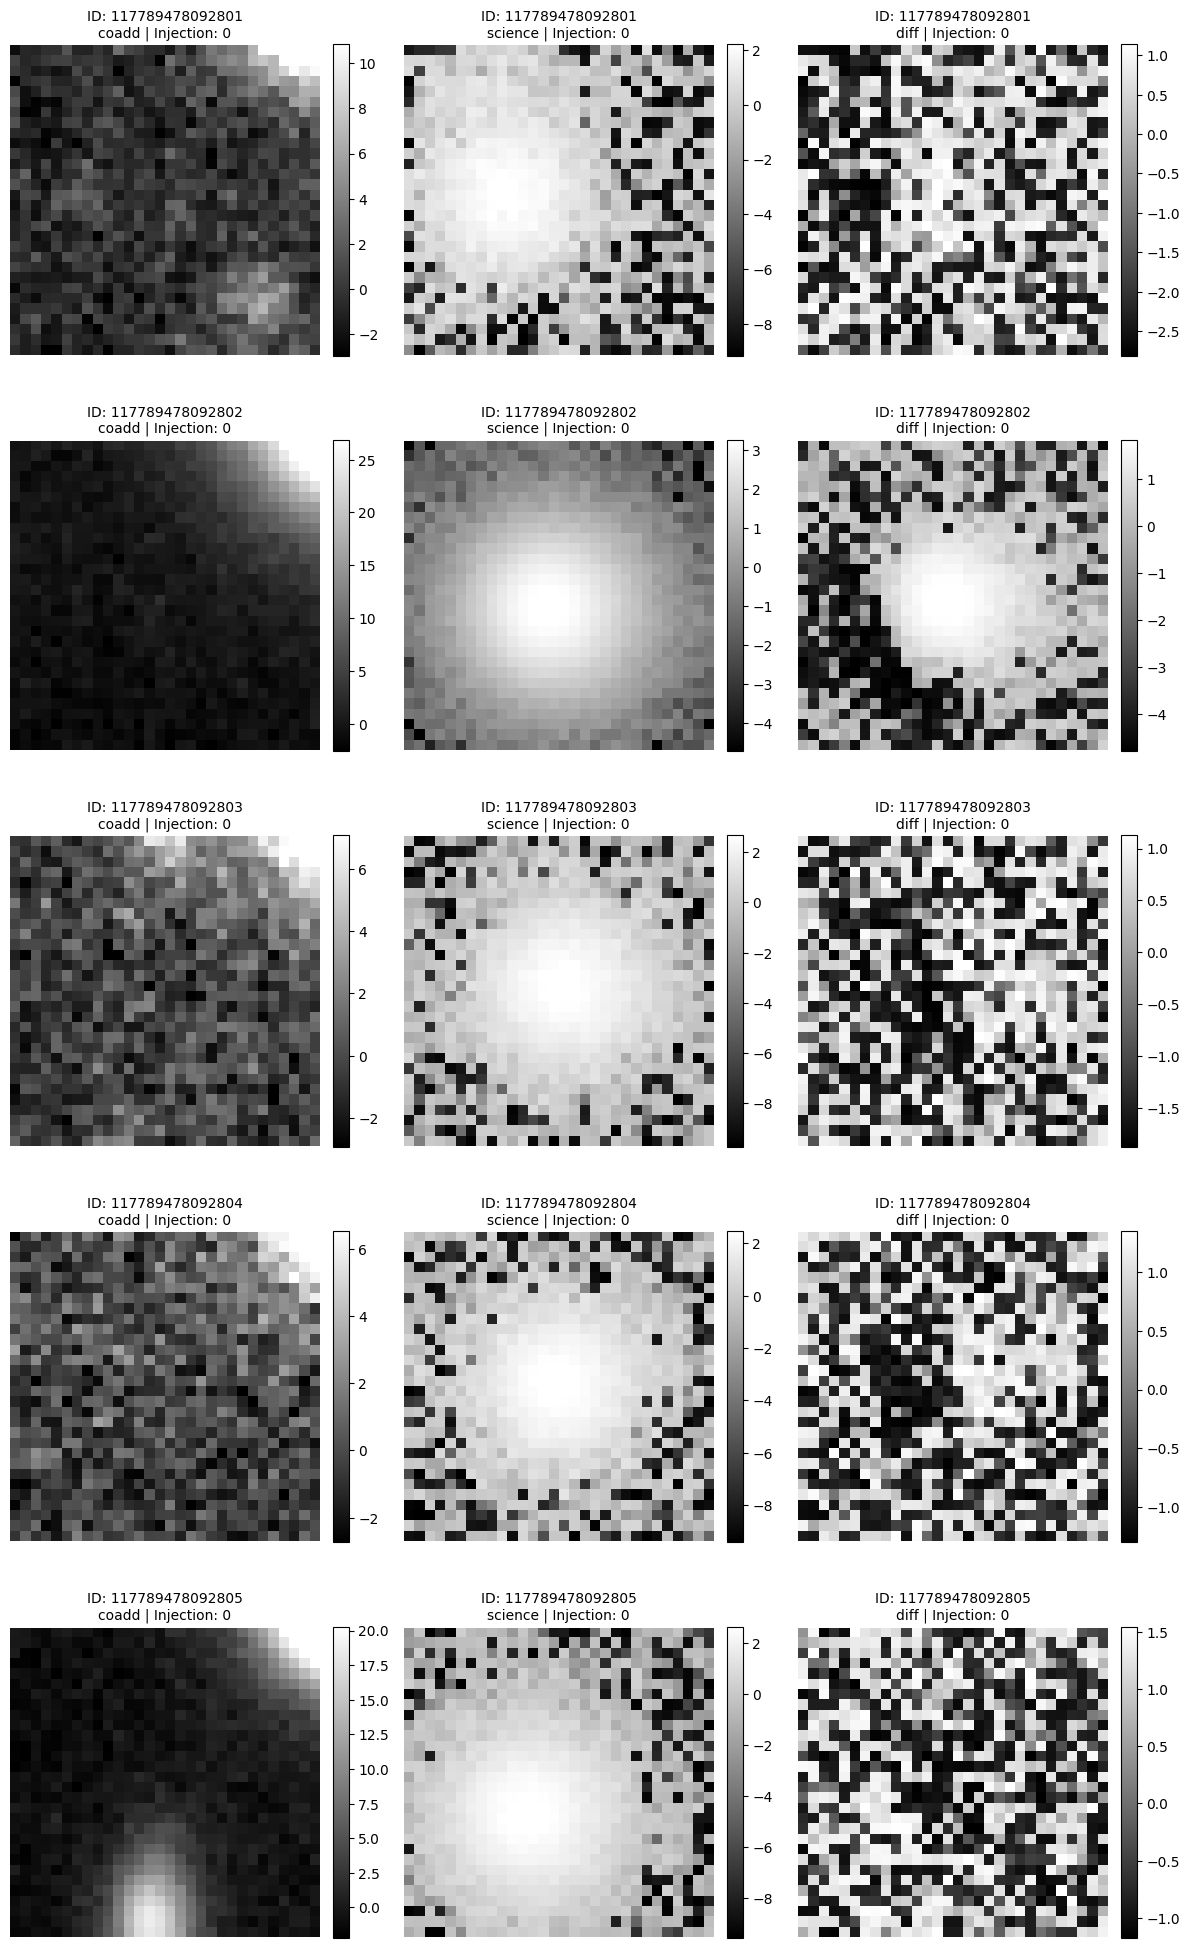

Cutout shape: (30, 30)
Value range: [-1.176, 1.547]


In [3]:
import matplotlib.pyplot as plt

first_visit = dataset.visits[0]
print(f"Loading cutouts from visit {first_visit}")

cutout_loader = dataset.cutouts[first_visit]
feature_loader = dataset.features[first_visit]
sample_ids = cutout_loader.ids[:5]  # show two DIA IDs

cutout_types = ['coadd','science', 'diff']

# rows = number of samples, columns = number of cutout types
n_rows = len(sample_ids)
n_cols = len(cutout_types)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))

for row_idx, dia_id in enumerate(sample_ids):
    features = feature_loader.get_by_id(dia_id)
    is_injection = features['is_injection'].iloc[0] if not features.empty else False

    for col_idx, cutout_type in enumerate(cutout_types):
        ax = axes[row_idx, col_idx] if n_rows > 1 else axes[col_idx]

        # Load cutout of a specific type
        cutout = cutout_loader.get_by_id(dia_id, cutout_type=cutout_type)

        im = ax.imshow(cutout, cmap='gray', origin='lower')
        ax.set_title(f'ID: {dia_id}\n{cutout_type} | Injection: {is_injection}', fontsize=10)
        ax.axis('off')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# Optional diagnostics for one example
print(f"Cutout shape: {cutout.shape}")
print(f"Value range: [{cutout.min():.3f}, {cutout.max():.3f}]")


# LC visualization

Loaded lightcurve index with 3856539 objects
13 sources in the light curves 


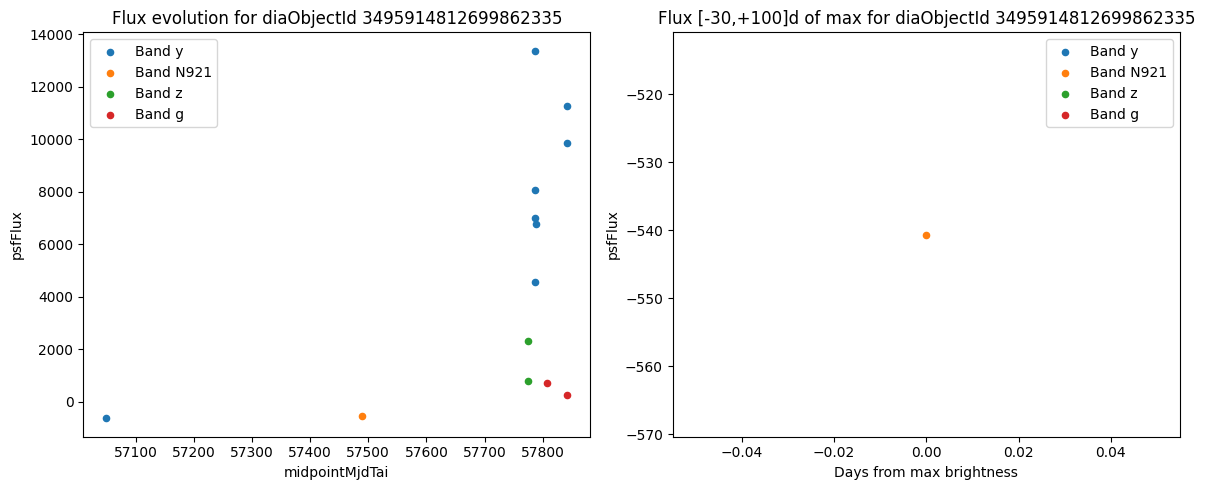

In [4]:
dataset.lightcurves.plot_lightcurve(dia_object_id=3495914812699862335)

In [3]:
data_path = dataset.data_paths[0]
diasource_index_file = data_path / "lightcurves" / "diasource_patch_index.h5"
data_path

PosixPath('/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd')

In [4]:
diasource_index = pd.read_hdf(diasource_index_file, key='diasource_index')


In [ ]:
dia_object_id=3495901618560337471
sources_for_object = diasource_index[diasource_index['diaObjectId'] == dia_object_id]
len(sources_for_object)
sources_for_object

,diaObjectId,tract,patch,patch_key,visit
diaSourceId,,,,,
40268840273182767,3495928006839403511,9813,29,9813_29,93758
40280846854258713,3495928006839403511,9813,29,9813_29,93786
40286861955956743,3495928006839403511,9813,29,9813_29,93800
40292872762687513,3495928006839403511,9813,29,9813_29,93814
41864813613154370,3495928006839403511,9813,29,9813_29,97474
41869125760319555,3495928006839403511,9813,29,9813_29,97484
41873420727615499,3495928006839403511,9813,29,9813_29,97494
41877732874780706,3495928006839403511,9813,29,9813_29,97504
41878591868239958,3495928006839403511,9813,29,9813_29,97506


In [23]:
sources_for_object.columns

Index(['diaObjectId', 'tract', 'patch', 'patch_key', 'visit'], dtype='object')

In [30]:
def plot_lc_cutout(dia_object_id, cutout_type="diff"): 
    sources_for_object = diasource_index[diasource_index['diaObjectId'] == dia_object_id]
    len(sources_for_object)
    sources_for_object
    # number of sources
    n = len(sources_for_object.index)
    if n>20: 
        print("too long")
        return 0
    # create subplots (1 row, n columns)
    fig, axes = plt.subplots(1, n, figsize=(4*n, 4))  # adjust figsize as needed

    # ensure axes is iterable even if n=1
    if n == 1:
        axes = [axes]

    for ax, i in zip(axes, sources_for_object.index):
        img = dataset.get_cutout_by_id(i, cutout_type=cutout_type)
        ax.imshow(img)
        ax.axis('off')  # optional, hide axes
        ax.set_title(str(i))  # optional, label each cutout

    plt.tight_layout()
    plt.show()

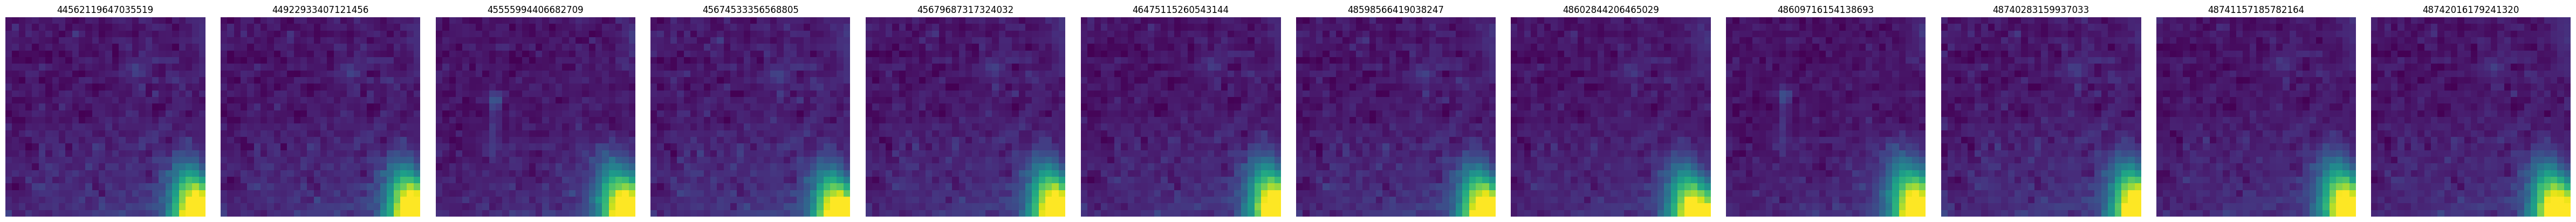

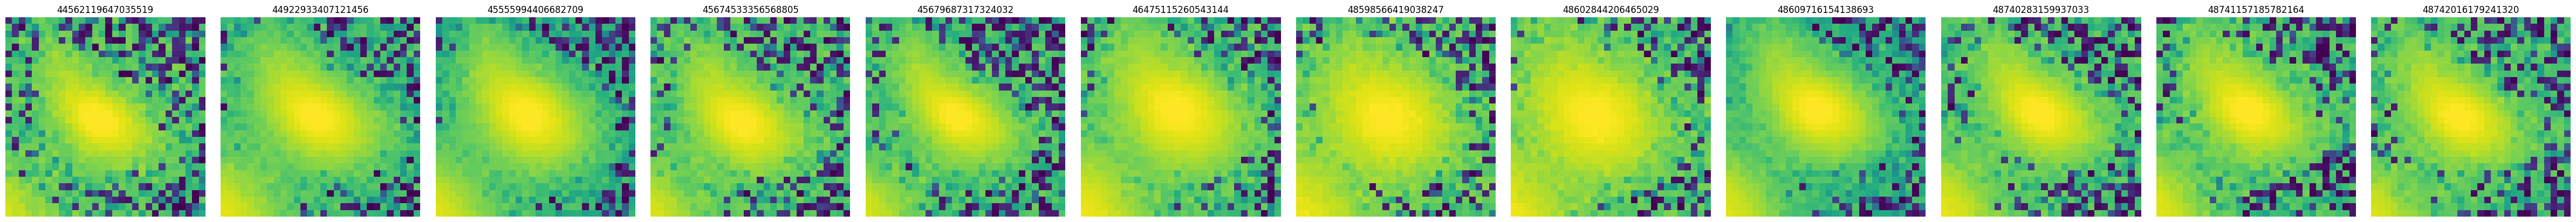

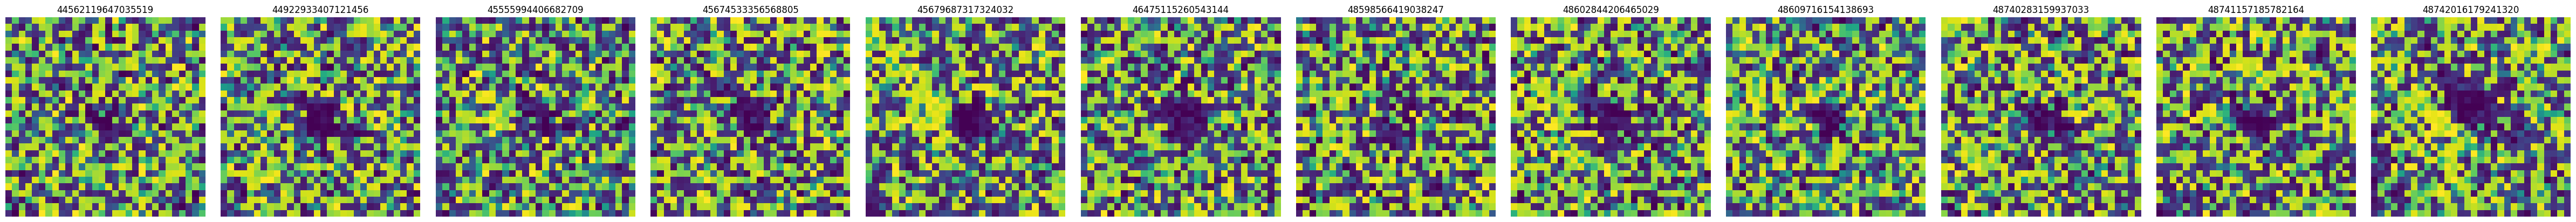

In [33]:
id=3496002773630107900
plot_lc_cutout(id, 'coadd')
plot_lc_cutout(id, 'science')
plot_lc_cutout(id, 'diff')

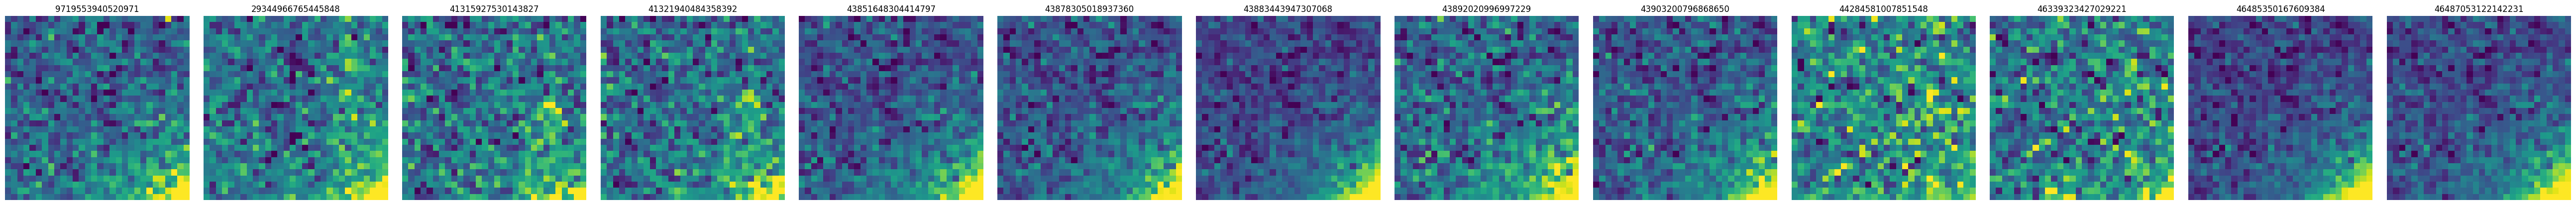

In [19]:
plot_lc_cutout(sources_for_object, 'coadd')

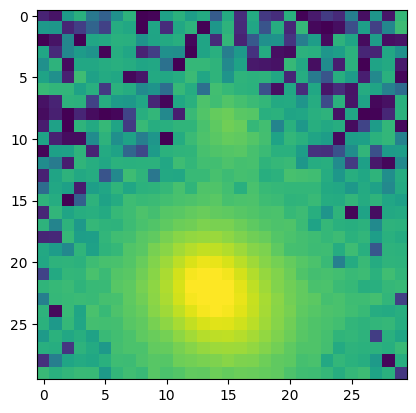

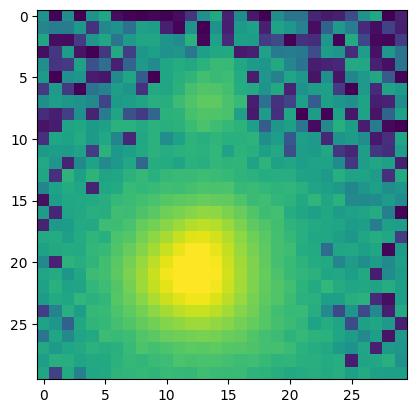

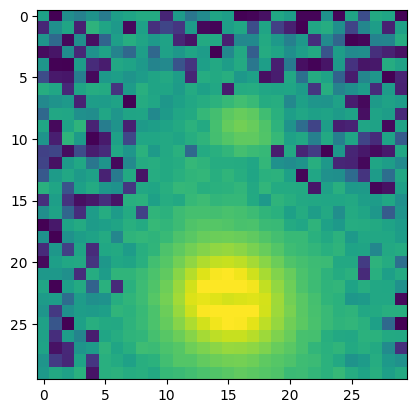

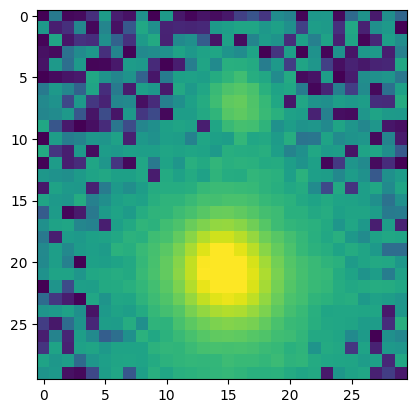

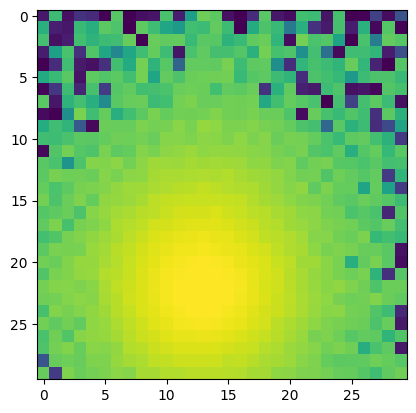

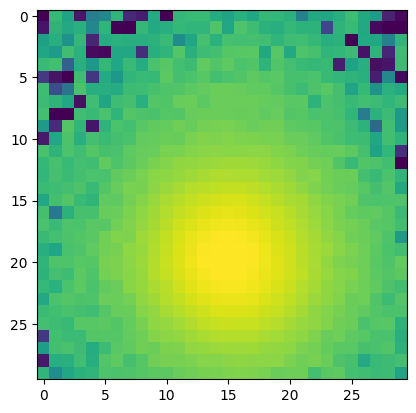

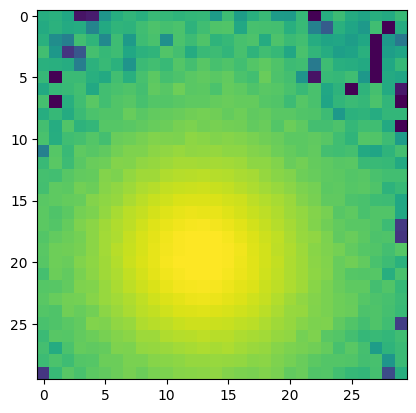

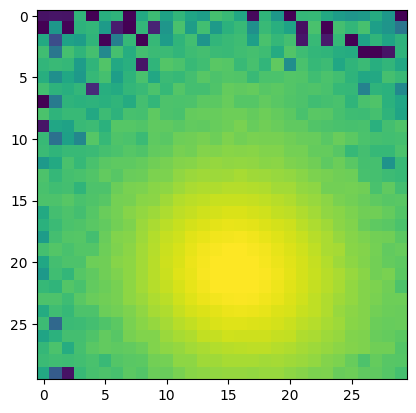

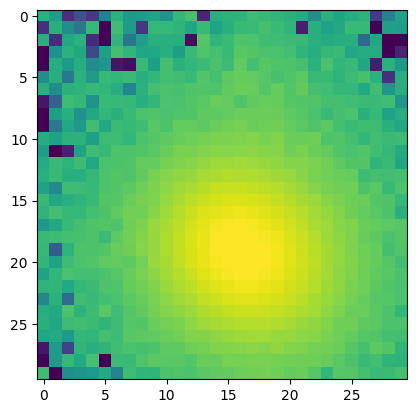

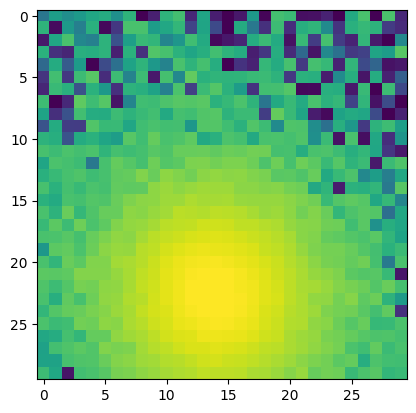

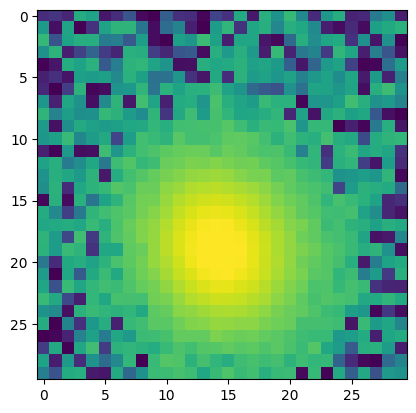

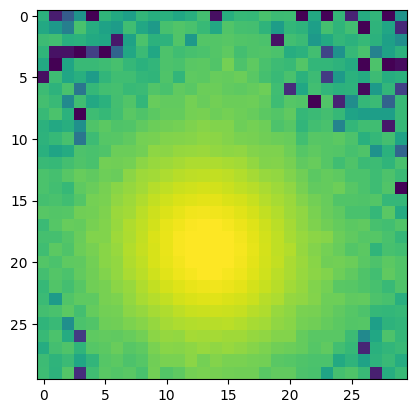

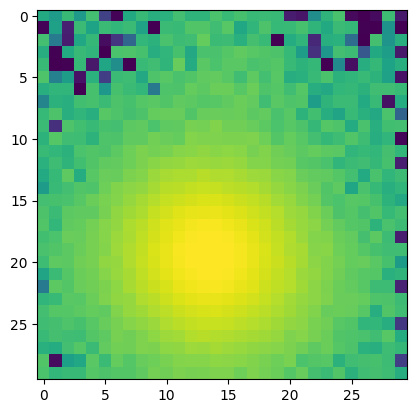

In [14]:
import matplotlib.pyplot as plt
for i in sources_for_object.index:
    plt.imshow(dataset.get_cutout_by_id(i, cutout_type='science'))
    plt.show()

# Lc inference

Loaded SNN inference data: 3856539 total lightcurves
  SNN processed: 489 lightcurves
  Not processed (failed filtering): 3856050 lightcurves
  Processing rate: 0.0%

SNN Inference Source Count Statistics:
  Mean sources per lightcurve: 17.7
  Min sources: 10
  Max sources: 116

VALIDATING SNN FILTERING CONSISTENCY
Checking 100 SNN-processed lightcurves against filtering criteria...
These objects have SNN results but don't meet filtering criteria:
  • 3495848842002207424: 9/14 pts in window, SNN used 13 pts
  • 3495862036141735228: 5/11 pts in window, SNN used 10 pts
  • 3495892822467314205: 8/13 pts in window, SNN used 11 pts

RECOMMENDATION: Re-run the SNN pipeline to ensure consistent filtering!


SNN-processed objects: 489
Non-SN: 20 (4.1%)
Supernova: 469 (95.9%)

Uncertainty Statistics:
Mean SN probability uncertainty: 0.153
High uncertainty objects (std > 0.1): 350

High-confidence SN (mean prob > 0.7): 329
High-confidence + Low uncertainty (std < 0.05): 32

Top 5 candidates (by 

/sps/lsst/users/rbonnetguerrini/ML4transients/src/ML4transients/data_access/data_loaders.py:1822: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


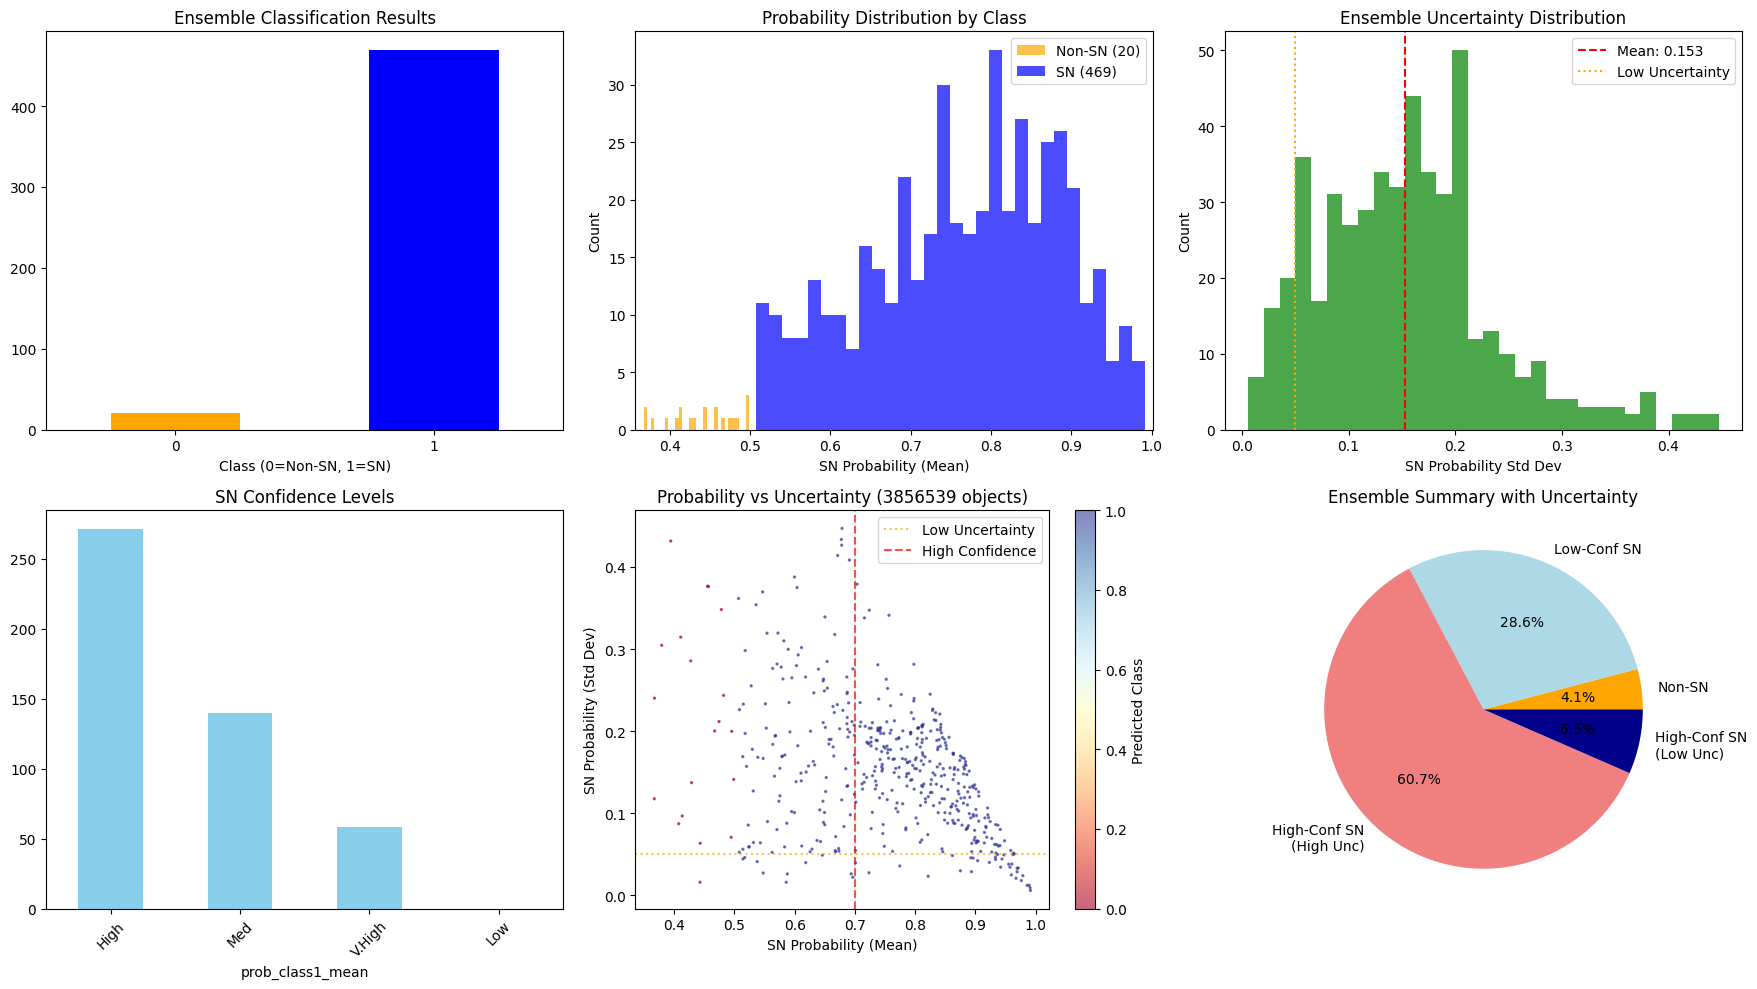


Ensemble Summary:
SNN-processed objects: 3856539
Total objects in dataset: 3856539
High-confidence SN candidates: 329
High-conf + Low uncertainty: 32
Mean uncertainty: 0.153
Objects with high uncertainty (>0.1): 350


In [7]:
r = dataset.lightcurves.inference_snn

Found 134 high-confidence diaObjectId candidates.
Total high-confidence diaSourceIds found: 3218


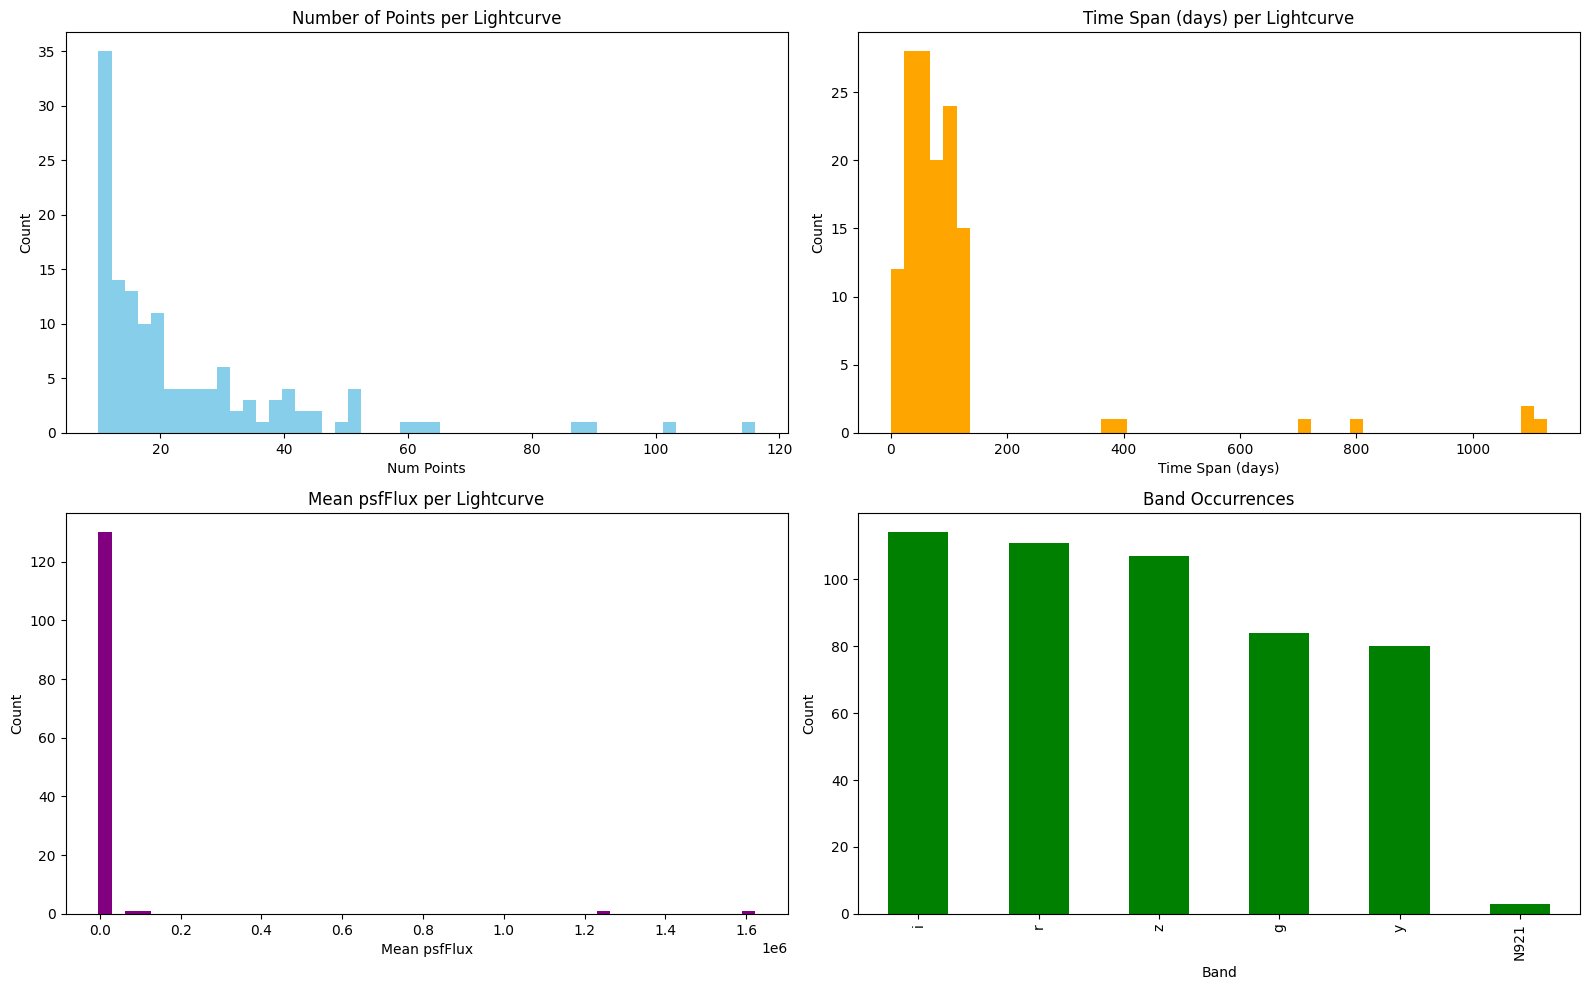

{'num_lightcurves': 134, 'num_points': {'mean': 24.01492537313433, 'median': 17.0, 'std': 18.231506710492397, 'min': 10, 'max': 116}, 'time_span_days': {'mean': 103.72895579558907, 'median': 66.45634030092697, 'std': 180.2897226941108, 'min': 0.08130277198506519, 'max': 1127.902769953711}, 'mean_psf_flux': {'mean': 24514.09339395371, 'median': 749.3459903033261, 'std': 175484.9369803862, 'min': -3693.8077353326335, 'max': 1621239.6222807483}, 'bands': {'unique': ['y', 'i', 'g', 'N921', 'z', 'r'], 'counts': {'i': 114, 'r': 111, 'z': 107, 'g': 84, 'y': 80, 'N921': 3}}}


In [8]:
high_conf = list(dataset.lightcurves.get_high_conf_sn_sources(prob_threshold=0.5, std_threshold=0.1))

diasource_index = dataset.lightcurves.diasource_index
# This will get the unique diaObjectIds corresponding to your high-confidence sources
high_conf_obj_ids = list(set(diasource_index.loc[
    diasource_index.index.isin(high_conf), 'diaObjectId'
]))

stats_dict = dataset.lightcurves.summarize_multiple_lightcurves(high_conf_obj_ids)
print(stats_dict)

Found 449 high-confidence diaObjectId candidates.
Total high-confidence diaSourceIds found: 8242


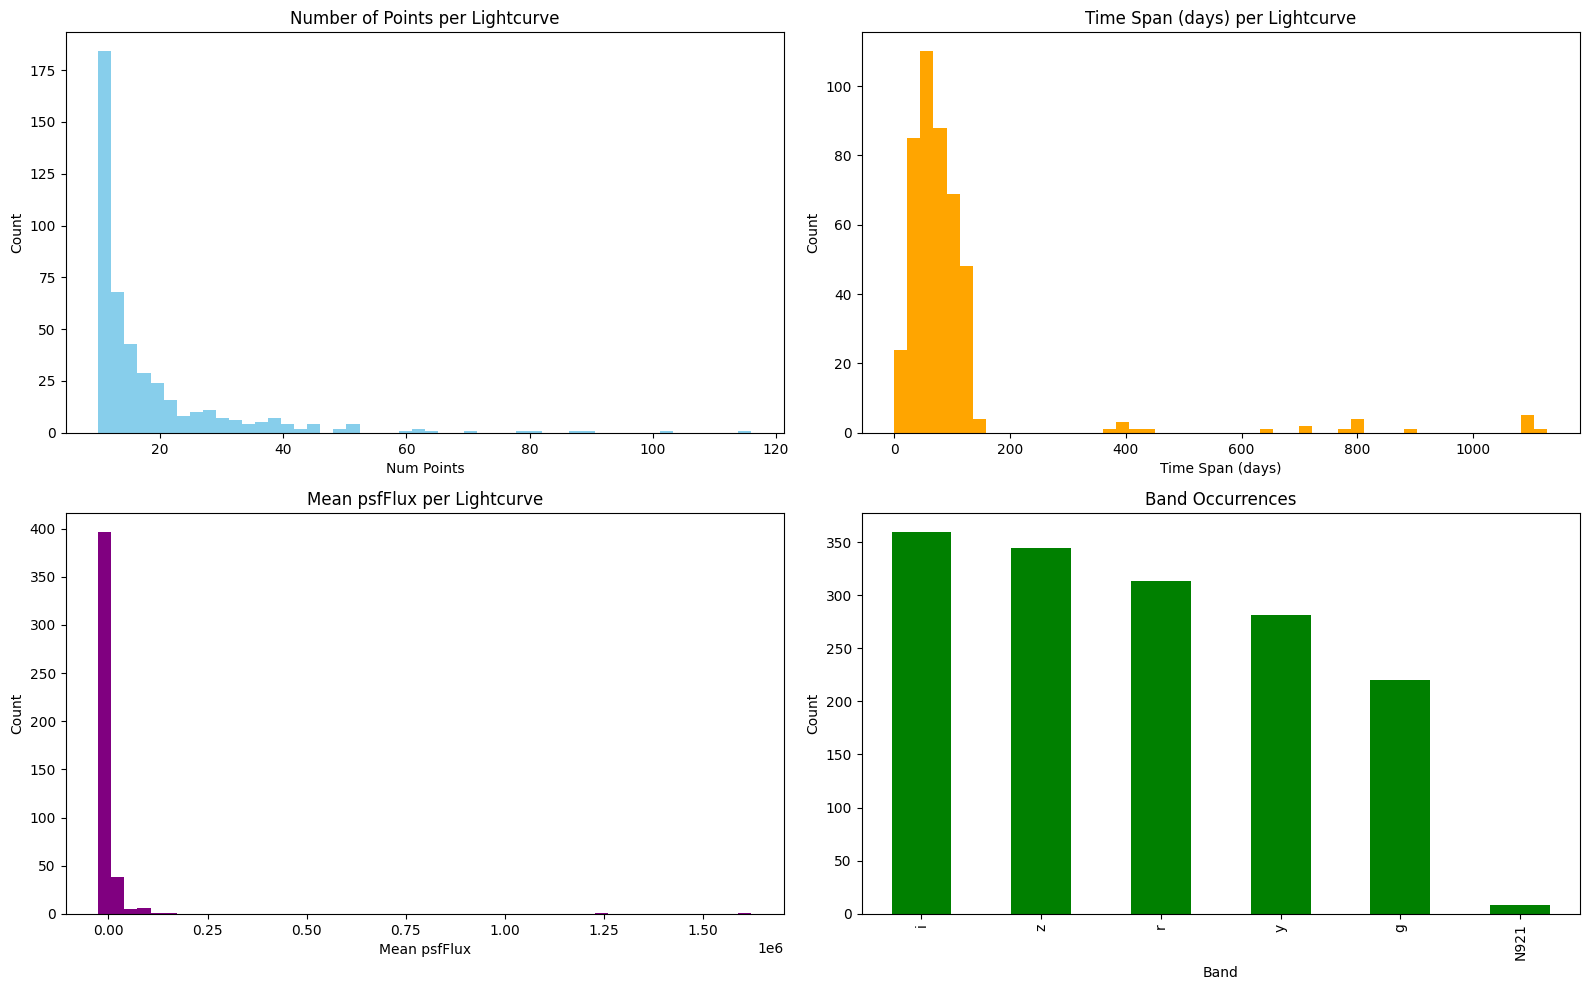

{'num_lightcurves': 449, 'num_points': {'mean': 18.356347438752785, 'median': 13.0, 'std': 13.227745054242751, 'min': 10, 'max': 116}, 'time_span_days': {'mean': 102.3054888785656, 'median': 69.89873116898525, 'std': 160.0333985852665, 'min': 0.08130277198506519, 'max': 1127.902769953711}, 'mean_psf_flux': {'mean': 10651.428850543305, 'median': 700.8829371603704, 'std': 97268.3648387036, 'min': -25293.336595084944, 'max': 1621239.6222807483}, 'bands': {'unique': ['r', 'i', 'g', 'N921', 'z', 'y'], 'counts': {'i': 359, 'z': 344, 'r': 313, 'y': 281, 'g': 220, 'N921': 8}}}


In [5]:
high_conf = list(dataset.lightcurves.get_high_conf_sn_sources(prob_threshold=0.5, std_threshold=0.3))

diasource_index = dataset.lightcurves.diasource_index
# This will get the unique diaObjectIds corresponding to your high-confidence sources
high_conf_obj_ids = list(set(diasource_index.loc[
    diasource_index.index.isin(high_conf), 'diaObjectId'
]))

stats_dict = dataset.lightcurves.summarize_multiple_lightcurves(high_conf_obj_ids)
print(stats_dict)

In [11]:
dataset.lightcurves.save_high_conf_subset_dataset("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_SNN", prob_threshold=0.5, std_threshold=0.3)

Found 449 high-confidence diaObjectId candidates.
Total high-confidence diaSourceIds found: 8242
Saving 8242 high-confidence SN sources to mini-dataset.
Saved filtered lightcurve_index.h5: 449 entries
Saved filtered diasource_patch_index.h5: 8242 entries
Found 449 high-confidence diaObjectIds
No high-confidence sources found in patch_9813_9.h5
Saved 31 lightcurve sources to patch_9813_2.h5
Saved 217 lightcurve sources to patch_9813_52.h5
Saved 12 lightcurve sources to patch_9813_75.h5
Saved 273 lightcurve sources to patch_9813_40.h5
Saved 163 lightcurve sources to patch_9813_24.h5
Saved 139 lightcurve sources to patch_9813_20.h5
Saved 254 lightcurve sources to patch_9813_38.h5
Saved 175 lightcurve sources to patch_9813_21.h5
No high-confidence sources found in patch_9813_18.h5
Saved 27 lightcurve sources to patch_9813_71.h5
No high-confidence sources found in patch_9813_79.h5
Saved 156 lightcurve sources to patch_9813_42.h5
Saved 100 lightcurve sources to patch_9813_41.h5
Saved 125 lig

# Cross matching


## High conf


In [12]:
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_SNN")
small_ds._discover_data()

Data discovery completed in 0.02s: 664 cutout visits, 664 feature visits, 1 lightcurve paths


In [18]:
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_SNN")
nogaia = small_ds.filter_by_crossmatch('source_cat_gaia', matched=True)
small_ds = DatasetLoader("/sps/lsst/groups/transients/HSC/fouchez/raphael/data/UDEEP_coadd_SNN")
agn = small_ds.filter_by_crossmatch('milliquas_filtered', matched=True)

Loaded cross-match data for 449 objects
Loaded cross-match data for 449 objects


In [ ]:
for i in nogaia:
    print(i)

3496029161909218091
3495976385351006424
3495976385351019030
3495906016606835778
3495906016606838787
3495906016606839883
3495906016606843127
3495888424420857919
3495888424420867657
3495888424420887788
3495967589258005654
3495967589258009422
3495967589258014460
3495967589258016524
3495892822467314205
3495892822467320562
3496112724792855090
3496112724792857537
3495985181444042443
3495985181444044505
3495985181444047538
3495945599025457065
3495945599025463841
3496046754095203202
3496090734560315335
3496090734560319202
3496090734560320819
3496086336513793850
3496086336513793860
3496086336513797153
3496095132606818918
3496095132606821418
3496095132606825171
3496095132606827313
3495862036141715830
3495862036141729733
3495928006839402923
3496143511118432745
3496143511118433352
3495897220513822327
3495897220513822626
3496068744327776980
3496068744327781295
3495971987304537630
3495971987304543597
3495818055676621387
3495963191211497507
3496007171676610077
3495853240048708674
3495923608792933337


: 

In [17]:
for i in agn:
    print(i)

3495976385351025819
3495906016606839094
3495888424420898774
3495985181444047538
3495945599025457461
3495945599025479796
3496046754095217818
3496046754095217938
3496090734560319202
3496095132606820418
3495971987304562553
3496007171676619078
3495923608792948168
3496099530653325421
3495949997071967555
3495949997071971839
3495949997071973741
3495936802932425393
3495910414653355215
3495910414653359589
3495954395118469515
3496103928699850834
3495901618560353722


## Udeep

In [8]:
gaia_stars = dataset.filter_by_crossmatch('source_cat_gaia', matched=True)
transient_candidates = dataset.filter_by_crossmatch('source_cat_gaia', matched=False)

Loaded cross-match data for 3856539 objects


In [7]:
for i in gaia_stars:
    print(i)

3495840045909147659
3495840045909147734
3495840045909147813
3495809259583569933
3495809259583569976
3495809259583569985
3495809259583569987
3495809259583569999
3495809259583570000
3495809259583570009
3495809259583570067
3495809259583570078
3495809259583570079
3495809259583570081
3495809259583570082
3495809259583570083
3495809259583570084
3495809259583570091
3495809259583570094
3495809259583570118
3495809259583570133
3495809259583570142
3495809259583570156
3495809259583570170
3495809259583570182
3495809259583570189
3495809259583570190
3495809259583570191
3495809259583570198
3495809259583570213
3495809259583570236
3495809259583570296
3495809259583570376
3495809259583570444
3495809259583570472
3495809259583570484
3495809259583570497
3495809259583570505
3495809259583570508
3495809259583570510
3495809259583570538
3495809259583570539
3495809259583570540
3495809259583570542
3495809259583570544
3495809259583570545
3495809259583570546
3495809259583570548
3495809259583570551
3495809259583570552
